In [3]:
# load the dataset
from sklearn.datasets import load_boston
# load the dataset
from sklearn.datasets import load_boston
boston_house_price_data = load_boston()

In [4]:
print(boston_house_price_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

**Dealing with missing Data**

In [8]:
import pandas as pd
import numpy as np

In [9]:
#no of rooms across 5 data points
pd.Series([1,2,3,1,2])

0    1
1    2
2    3
3    1
4    2
dtype: int64

In [10]:
pd.Series([1,np.nan,3,1,None])

0    1.0
1    NaN
2    3.0
3    1.0
4    NaN
dtype: float64

In [12]:
num_rooms = pd.Series([1,np.nan,3,1,None])
num_rooms.isnull()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [13]:
num_rooms[num_rooms.isnull()]

1   NaN
4   NaN
dtype: float64

In [14]:
df = pd.DataFrame([[1, np.nan, 2], 
                  [2, 300, 5],
                  [1, np.nan, np.nan]])
df

,0,1,2
0,1,NaN,2.0
1,2,300.0,5.0
2,1,NaN,NaN


In [16]:
df.isnull()

,0,1,2
0,False,True,False
1,False,False,False
2,False,True,True


In [17]:
#df.dropna()

In [19]:
means = df.mean(axis=0)

In [20]:
df.fillna(means)

,0,1,2
0,1,300.0,2.0
1,2,300.0,5.0
2,1,300.0,3.5


**Standardization and Normalization**

In [21]:
#if our featuer doesnt look like it has a avg  of 0 and variance of 1, then our ML model will fail to work correctly

In [22]:
data = [
    [0,0],[0,0],
    [1,1],[1,1]
]
data

[[0, 0], [0, 0], [1, 1], [1, 1]]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
StandardScaler().fit_transform(data)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [25]:
from sklearn import preprocessing

In [27]:
preprocessing.normalize(data, norm='l2')

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678]])

**Eliminating Duplicate entries**

In [28]:
# load the dataset
from sklearn.datasets import load_boston
boston_house_price_data = load_boston()

In [ ]:
#lot of ML algo work on summary statistics...Duplicate data will result in the algo's being biased as they aggrigate 
# big data sets.. duplicate data doent mean new things, they are simply represent the same data points twice.

In [29]:
x = pd.DataFrame(boston_house_price_data.data)

In [30]:
x[x.duplicated()]

,0,1,2,3,4,5,6,7,8,9,10,11,12


In [31]:
x = x.append(x.iloc[0,:], ignore_index=True)

In [32]:
x[x.duplicated()]

,0,1,2,3,4,5,6,7,8,9,10,11,12
506,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [34]:
x.shape

(507, 13)

In [35]:
x = x.drop_duplicates()

In [36]:
x[x.duplicated()]

,0,1,2,3,4,5,6,7,8,9,10,11,12


 **Classification**

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris_data = load_iris()

In [7]:
print(iris_data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
X = iris_data.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
import pandas as pd

In [10]:
X_df = pd.DataFrame(X, columns = iris_data.feature_names)
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
X_df['flower_names'] = iris_data.target
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [14]:
 X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [15]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
X_df.groupby('flower_names').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
flower_names,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


**Applying Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
y = iris_data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=142 )

In [ ]:
X_test.shape

In [45]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
model.predict(X_train[0].reshape(1, -1))

array([1])

In [39]:
y_train[0]

1

In [41]:
y_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [46]:
model.predict(X_test) == y_test

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [47]:
y_pred = model.predict(X_test)

In [48]:
model.score(X_test, y_test)

0.9

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_pred=y_pred, y_true=y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.77      0.87        22
          2       0.75      1.00      0.86        15

avg / total       0.93      0.90      0.90        50



*** Boston House data set -Predicting future prices ***

In [52]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [53]:
X = boston_data.data
y = boston_data.target

In [55]:
import pandas as pd
X_df = pd.DataFrame(X, columns=boston_data.feature_names)

In [57]:
X_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [59]:
import numpy as np

In [60]:
len(y)

506

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/abhiram/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


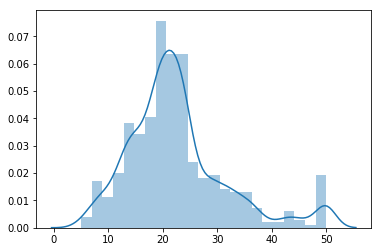

In [66]:
sns.distplot(y)

In [69]:
plt.show()

In [70]:
# example of error or RMSE

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
y_pred = [0] * 506

In [73]:
mean_squared_error(y, y_pred)

592.1469169960474

/home/abhiram/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


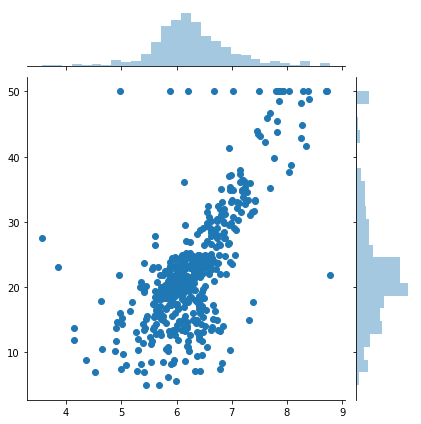

In [75]:
sns.jointplot(X[:,5], y)
plt.show()

In [76]:
# room 4 has no affect on the model..so removve it

In [77]:
def manual_model(house):
    return (house[5] - 4)*10

In [78]:
y_pred = [manual_model(x) for x in X]

In [79]:
mean_squared_error(y, y_pred)

44.09607252964427

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [87]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
y_pred_ml = model.predict(X_test)

In [89]:
mean_squared_error(y_test, y_pred_ml)

20.74714336030893